<a href="https://colab.research.google.com/github/SilasEmma/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data exploration, model development on Titanic datasets.
Building a logistic regression algorithm on the titanic datasets to predict number of survival.

In [79]:
# importing relevant libraries

# utilities tools 
import io
from google.colab import files
# data manipulation and numeric computation library
import pandas as pd
import numpy as np
# visualization tools
import seaborn as sns
from matplotlib import pyplot as plt
# model development tools
# using logistic for binary classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, validation_curve, KFold, GridSearchCV
# accuracy score for measuring model performance
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, plot_precision_recall_curve

In [4]:
# uploading titanic datasets from local machine to  colab
upload = files.upload()

Saving titanic_data.csv to titanic_data.csv


In [5]:
# converting to 
tit = pd.read_csv(io.BytesIO(upload['titanic_data.csv']))

In [6]:
# returns the first five row of each column
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# return the datatype 
tit.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [8]:
# return the number of column with missing value
tit.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Data Analysis**

Using visualization tools to discover hidden insight or pattern.





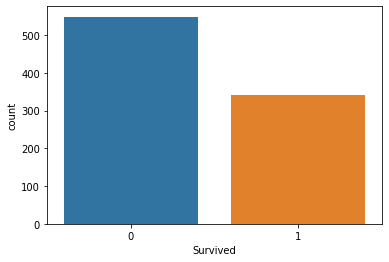

In [9]:
# plotting Survival, where 0 implies numbers of death and 1 numbers of survival
sns.countplot(x='Survived', data=tit)

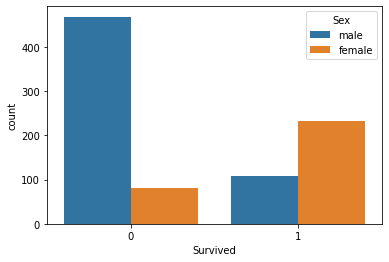

In [10]:
# plotting survival by gender, with more female survival than male and more male death than female
sns.countplot(x='Survived', hue='Sex', data=tit)

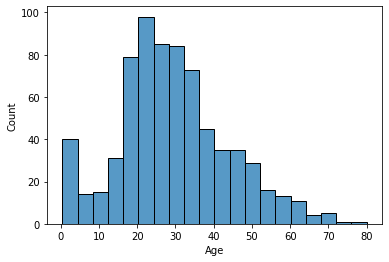

In [11]:
# plotting age using histogram, the titanic ship contain more people with age range 19-45years old.
sns.histplot(data=tit, x='Age')

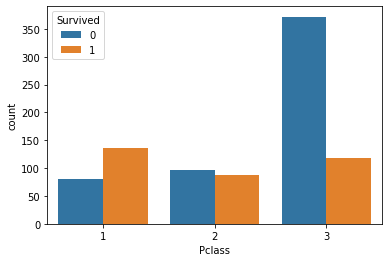

In [12]:
# plotting pclass by survival, where passenger in the 3rd class have the highest death rate,
# passenger in the 1st class have the least death and highest survival rate.
sns.countplot(x='Pclass', hue='Survived', data=tit)

**Data Wrangling**

Cleaning messy data, selecting relevant data, transforming data for analysis and building machine learning model.



In [13]:
# viewing titanic dataset
tit.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [14]:
# drop inrelevant columns
tit.drop(columns=['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [15]:
#
tit.dropna(inplace=True)

In [16]:
tit.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S


In [17]:
# converting the selected categorical columns into numeric, also known as one hot encoding
sex = pd.get_dummies(tit['Sex'], drop_first=True)
pcl = pd.get_dummies(tit['Pclass'], drop_first=True)
emb = pd.get_dummies(tit['Embarked'], drop_first=True)

In [18]:
tit = pd.concat([tit,sex,pcl,emb], axis=1)
tit.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,male,2,3,Q,S
1,1,1,female,38.0,1,0,71.2833,C85,C,0,0,0,0,0
3,1,1,female,35.0,1,0,53.1000,C123,S,0,0,0,0,1
6,0,1,male,54.0,0,0,51.8625,E46,S,1,0,0,0,1
10,1,3,female,4.0,1,1,16.7000,G6,S,0,0,1,0,1
11,1,1,female,58.0,0,0,26.5500,C103,S,0,0,0,0,1


In [19]:
# dropping the following colums
tit.drop(columns=['Sex', 'Embarked', 'Pclass', 'Cabin'], axis=1, inplace=True)

In [20]:
tit.head()

,Survived,Age,SibSp,Parch,Fare,male,2,3,Q,S
1,1,38.0,1,0,71.2833,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,0,1
6,0,54.0,0,0,51.8625,1,0,0,0,1
10,1,4.0,1,1,16.7000,0,0,1,0,1
11,1,58.0,0,0,26.5500,0,0,0,0,1


**Model Development**

> Logistics Regression is being used here to build a simple model that will predict survival



In [21]:
X = tit.drop('Survived', axis=1)
y = tit['Survived']

In [22]:
# splitting dataset into training set and testing set.
# 75% of the dataset is used for training, while 35% for testing with 42% random state
(x_train, x_test, y_train, y_test) = train_test_split(X, y, test_size=0.35, random_state=42)

In [23]:
# initializing model and fit model for training
model = LogisticRegression(max_iter=300, penalty='l2', l1_ratio=0)
model.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0, max_iter=300,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
y_hat = model.predict(x_test)

In [25]:
classification_report(y_test, y_hat)

'              precision    recall  f1-score   support\n\n           0       0.58      0.65      0.61        23\n           1       0.79      0.74      0.77        42\n\n    accuracy                           0.71        65\n   macro avg       0.69      0.70      0.69        65\nweighted avg       0.72      0.71      0.71        65\n'

In [26]:
confusion_matrix(y_test, y_hat)

array([[15,  8],
       [11, 31]])

In [53]:
accuracy_score(y_test, y_hat)

0.7076923076923077

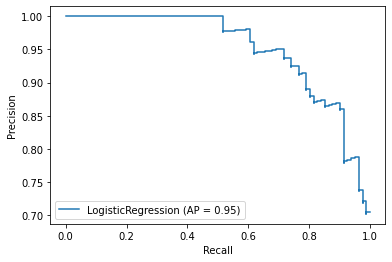

In [80]:
# Plot Receiver operating characteristic (ROC) curve.
plot_precision_recall_curve(model, x_train, y_train, )

The model have 70% **accuracy**

***Adding Support Vector Classifier and Kneighbors to get the model with best Accuracy Score***

> 


**Applying Parameter Turning and Cross Validation**

> Support Vector Classifier:- Using both parameter turning and cross validation to get the best parameter.

> KneighborsClassifier:- Using both parameter turning and cross validation to get the best parameter.






In [28]:
# support vector classifier
clf = SVC()

In [29]:
# Split train/test dataset into k consecutive folds, each fold is then used once as a validation
kfld = KFold(n_splits=6, shuffle=True)

# speciflying parameter values of an estimator (SVC).
param = {'kernel':('linear', 'poly', 'rbf', 'sigmoid'), 
         'C':list(range(1, 5))}

# Parameter Turning
#Exhaustive search over specified parameter values for an estimator.
grid = GridSearchCV(estimator=clf, param_grid=param, scoring='roc_auc', cv=kfld)
# fitting train/test data for training
grid.fit(x_train, y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=True),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 2, 3, 4],
                         'kernel': ('linear', 'poly', 'rbf', 'sigmoid')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [30]:
# return the best parameter
grid.best_params_

{'C': 1, 'kernel': 'linear'}

In [31]:
f = pd.DataFrame(grid.cv_results_)
# returns sort of the rank column in ascending order
f.sort_values(by=['rank_test_score'], inplace=True)
f.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.175787,0.095570,0.002384,0.000089,1,linear,"{'C': 1, 'kernel': 'linear'}",0.785714,0.821429,0.780220,0.923077,0.910256,0.771429,0.832021,0.061945,1
4,0.422702,0.277677,0.002278,0.000075,2,linear,"{'C': 2, 'kernel': 'linear'}",0.809524,0.797619,0.802198,0.934066,0.858974,0.785714,0.831349,0.051414,2
12,1.699941,1.529888,0.002269,0.000046,4,linear,"{'C': 4, 'kernel': 'linear'}",0.785714,0.773810,0.802198,0.945055,0.782051,0.800000,0.814805,0.059080,3
8,1.193141,1.432931,0.002241,0.000029,3,linear,"{'C': 3, 'kernel': 'linear'}",0.785714,0.773810,0.791209,0.945055,0.769231,0.800000,0.810836,0.060897,4
5,0.005144,0.001554,0.001957,0.000141,2,poly,"{'C': 2, 'kernel': 'poly'}",0.619048,0.750000,0.703297,0.890110,0.794872,0.571429,0.721459,0.106438,5


In [55]:
# return the best estimator
grid.best_estimator_

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [58]:
# returns the best score
grid.best_score_

0.8320207570207571

In [61]:
# building model with the best estimator
clf = SVC(C=1, kernel='linear')
clf.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
y_pred = clf.predict(x_test)

In [63]:
# getting the model accuracy
print('Accuracy Score:-' "" + str(accuracy_score(y_test, y_pred)))

Accuracy Score:-0.676923076923077


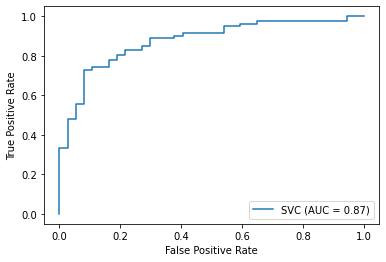

In [84]:
# Plot Receiver operating characteristic (ROC) curve.
plot_roc_curve(clf, x_train, y_train, )

In [33]:
# building kneighbors classifier
kn = KNeighborsClassifier()

In [46]:
# Split train/test dataset into k consecutive folds, each fold is then used once as a validation
fld = KFold(n_splits=4, random_state=40)

# speciflying parameter values of an estimator (SVC).
param_gd = {'algorithm' : ('brute', 'auto', 'ball_tree', 'kd_tree'), 
         'n_neighbors': list(range(1, 10)),
         'weights' : ('uniform','distance')}

# Parameter Turning
#Exhaustive search over specified parameter values for an estimator.
gridcv = GridSearchCV(estimator=kn, param_grid=param_gd, scoring='roc_auc', cv=fld, verbose=1)
# fitting train/test data for training
gridcv.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 72 candidates, totalling 288 fits


[Parallel(n_jobs=1)]: Done 288 out of 288 | elapsed:    1.3s finished


GridSearchCV(cv=KFold(n_splits=4, random_state=40, shuffle=False),
             error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'algorithm': ('brute', 'auto', 'ball_tree', 'kd_tree'),
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ('uniform', 'distance')},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=1)

In [47]:
# return the best parameter
gridcv.best_params_

{'algorithm': 'brute', 'n_neighbors': 1, 'weights': 'uniform'}

In [48]:
fd = pd.DataFrame(gridcv.cv_results_)
# returns sort of the rank column in ascending order
fd.sort_values(by=['rank_test_score'], inplace=True)
fd.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002953,0.002275,0.002499,0.000366,brute,1,uniform,"{'algorithm': 'brute', 'n_neighbors': 1, 'weig...",0.557416,0.575,0.544737,0.347826,0.506245,0.092092,1
1,0.001554,0.000081,0.002137,0.000034,brute,1,distance,"{'algorithm': 'brute', 'n_neighbors': 1, 'weig...",0.557416,0.575,0.544737,0.347826,0.506245,0.092092,1
19,0.001661,0.000013,0.002223,0.000013,auto,1,distance,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.557416,0.575,0.544737,0.347826,0.506245,0.092092,1
18,0.001661,0.000020,0.002176,0.000040,auto,1,uniform,"{'algorithm': 'auto', 'n_neighbors': 1, 'weigh...",0.557416,0.575,0.544737,0.347826,0.506245,0.092092,1
36,0.001652,0.000035,0.002156,0.000015,ball_tree,1,uniform,"{'algorithm': 'ball_tree', 'n_neighbors': 1, '...",0.557416,0.575,0.544737,0.347826,0.506245,0.092092,1


In [49]:
y_pr = gridcv.predict(x_test)

In [50]:
accuracy_score(y_test, y_pr)

0.5846153846153846

In [65]:
roc_auc_score(y_test, y_pr)

0.5802277432712216

In [68]:
#building DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=400,)

In [69]:
# Split train/test dataset into k consecutive folds, each fold is then used once as a validation
kfold = KFold(n_splits=6, shuffle=True)

# speciflying parameter values of an estimator (SVC).
param_grid = {'criterion' : ("gini", "entropy"), 
         'splitter' : ("best", "random")}

# Parameter Turning
#Exhaustive search over specified parameter values for an estimator.
gridsc = GridSearchCV(estimator=dt, param_grid=param_grid, scoring='roc_auc', cv=kfold, verbose=1)
# fitting train/test data for training
gridsc.fit(x_train, y_train)

Fitting 6 folds for each of 4 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.1s finished


GridSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=400,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             para

In [71]:
# return the best parameter
gridsc.best_params_

{'criterion': 'gini', 'splitter': 'best'}

In [72]:
fdl = pd.DataFrame(gridsc.cv_results_)
# returns sort of the rank column in ascending order
fdl.sort_values(by=['rank_test_score'], inplace=True)
fdl.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002083,0.000401,0.001779,0.000077,gini,best,"{'criterion': 'gini', 'splitter': 'best'}",0.466667,0.791667,0.65625,0.787879,0.564286,0.602564,0.644885,0.117026,1
2,0.002232,0.000506,0.002238,0.000494,entropy,best,"{'criterion': 'entropy', 'splitter': 'best'}",0.366667,0.854167,0.65625,0.898990,0.564286,0.519231,0.643265,0.186267,2
1,0.001889,0.000356,0.001755,0.000079,gini,random,"{'criterion': 'gini', 'splitter': 'random'}",0.500000,0.666667,0.40625,0.686869,0.764286,0.557692,0.596961,0.121281,3
3,0.001741,0.000044,0.001694,0.000024,entropy,random,"{'criterion': 'entropy', 'splitter': 'random'}",0.533333,0.500000,0.53125,0.641414,0.664286,0.391026,0.543551,0.090894,4


In [74]:
# building model with the best estimator
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [76]:
y_tr = dt.predict(x_test)

Accuracy Score0.7076923076923077


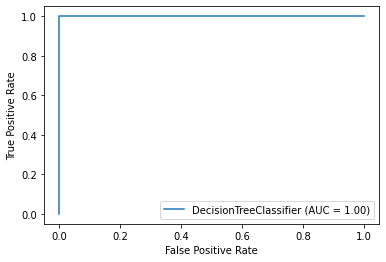

In [83]:
print('Accuracy Score' "" + str(accuracy_score(y_test, y_tr)))

plot_roc_curve(dt, x_train, y_train)